### Extração, Transformação e Carga do conjunto de dados

O arquivo m_3330.csv utilizado neste trabalho foi previamente tratado conforme explicado aqui:
https://github.com/dssantos/alibaba-datacenter-workload/blob/main/extract_transform_load.ipynb

### Importação das bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

### Conjunto de dados

In [3]:
# Carrega o conjunto de dados 'm_3330.csv' e ajusta o intervalo de tempo em 1 minuto

def dataframe(file):
    df = pd.read_csv(file, 
                 names = ['machine_id', 'time_stamp', 'cpu', 'mem', 'mem_gps', 
                          'mkpi', 'net_in', 'net_out', 'disk_io_percent'])
    df.time_stamp = pd.to_datetime(df.time_stamp, unit='s')
    df.set_index('time_stamp', inplace=True)
    df = df.resample('1min').interpolate()
    return df

workload3330 = dataframe('m_3330.csv')
workload694 = dataframe('m_694.csv')
workload103 = dataframe('m_103.csv')

### Uso de CPU

<AxesSubplot:xlabel='time_stamp'>

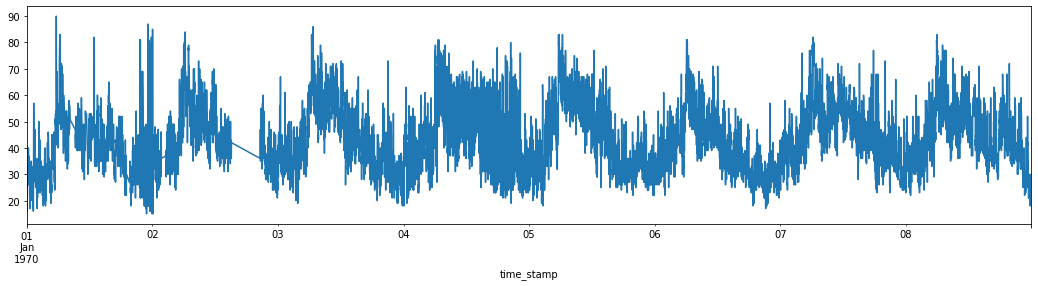

In [5]:
workload3330['cpu'].plot(figsize=(18,4))

<AxesSubplot:xlabel='time_stamp'>

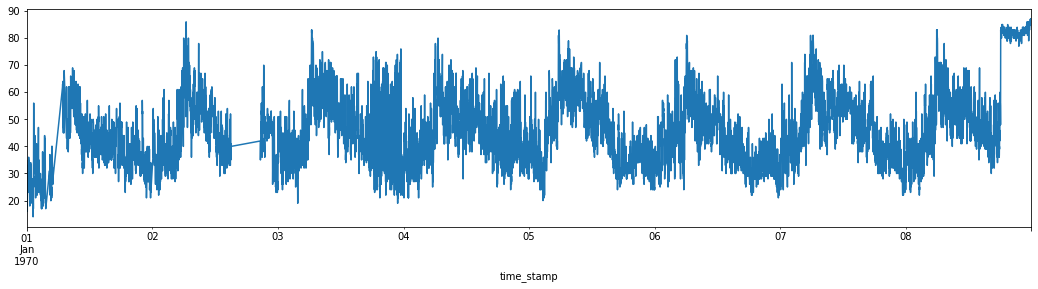

In [6]:
workload694['cpu'].plot(figsize=(18,4))

<AxesSubplot:xlabel='time_stamp'>

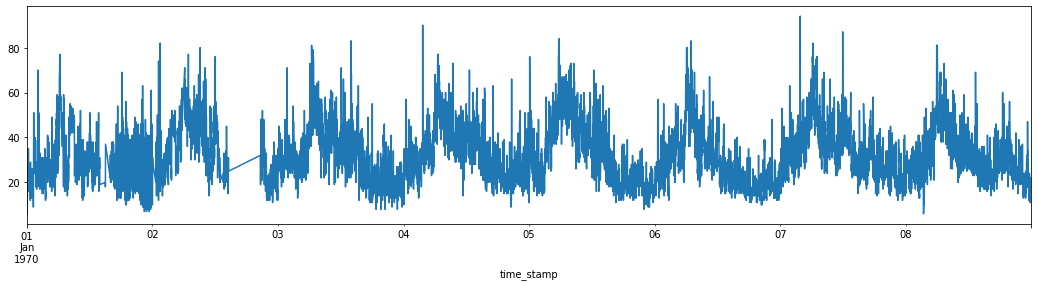

In [7]:
workload103['cpu'].plot(figsize=(18,4))

### Análise da série temporal

In [22]:
# Verifica se a média é constante ao longo do tempo (característica estacionária)

workload3330['mean'] = [np.mean(workload3330.cpu[:x]) for x in range(len(workload3330.cpu))]
workload694['mean'] = [np.mean(workload694.cpu[:x]) for x in range(len(workload694.cpu))]
workload103['mean'] = [np.mean(workload103.cpu[:x]) for x in range(len(workload103.cpu))]

Text(0.5, 0, 'tempo')

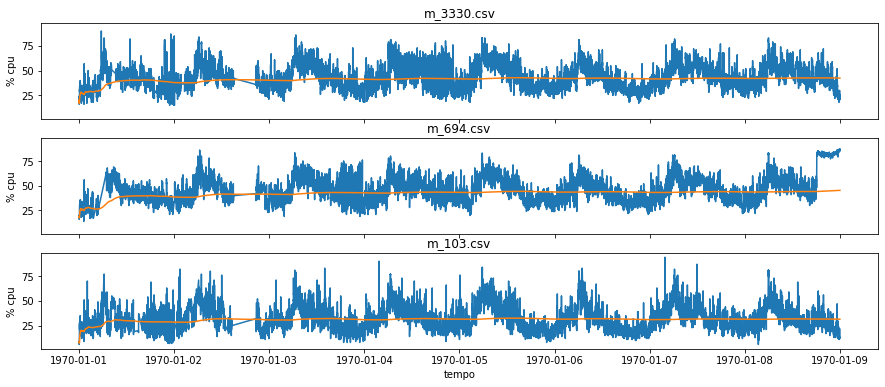

In [42]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15,6))
workload = workload3330
axs[0].set_title('m_3330.csv')
axs[0].plot(workload3330['cpu'])
axs[0].plot(workload3330['mean'])
axs[0].set(ylabel="% cpu")
axs[1].set_title('m_694.csv')
axs[1].plot(workload694['cpu'])
axs[1].plot(workload694['mean'])
axs[1].set(ylabel="% cpu")
axs[2].set_title('m_103.csv')
axs[2].plot(workload103['cpu'])
axs[2].plot(workload103['mean'])
axs[2].set(ylabel="% cpu")
plt.xlabel('tempo')

In [51]:
# Usando o teste Augmented Dickey-Fuller para obter o Valor-P
# O método adfuller retorna uma tupla cujo segundo item é o Valor-P
# Caso o Valor-P seja inferior a 5%, então a série é estacionária

for host in [workload3330, workload694, workload103]:
    machine = host.iloc[0,0]
    result = adfuller(host['cpu'])

    print(f'\n{machine}')
    print(f'adf: {result[0]:.2f}')
    print(f'pvalue: {result[1]:.2f}')
    print(f'usedlag: {result[2]:.2f}')
    print(f'nobs: {result[3]:.2f}')
    for key, value in result[4].items():
        print(f'{key} critical value: {value:.2f}')
    print(f'icbest: {result[5]:.2f}')


m_3330
adf: -5.76
pvalue: 0.00
usedlag: 36.00
nobs: 11483.00
1% critical value: -3.43
5% critical value: -2.86
10% critical value: -2.57
icbest: 76552.25

m_694
adf: -4.44
pvalue: 0.00
usedlag: 40.00
nobs: 11479.00
1% critical value: -3.43
5% critical value: -2.86
10% critical value: -2.57
icbest: 73301.79

m_103
adf: -6.05
pvalue: 0.00
usedlag: 36.00
nobs: 11483.00
1% critical value: -3.43
5% critical value: -2.86
10% critical value: -2.57
icbest: 76125.43


### Separar conjuntos de treino e  teste

In [59]:
test_perc3330 = 1/(len(workload3330)//60)
test_len3330 = int(len(workload3330)*test_perc)
train3330 = workload3330.iloc[:-test_len] # Conjunto de treino
test3330 = workload3330.iloc[-test_len:]  # Conjunto de teste

test_perc694 = 1/(len(workload694)//60)
test_len694 = int(len(workload694)*test_perc)
train694 = workload694.iloc[:-test_len] # Conjunto de treino
test694 = workload694.iloc[-test_len:]  # Conjunto de teste

test_perc103 = 1/(len(workload103)//60)
test_len103 = int(len(workload103)*test_perc)
train103 = workload103.iloc[:-test_len] # Conjunto de treino
test103 = workload103.iloc[-test_len:]  # Conjunto de teste


Text(0.5, 0, 'tempo')

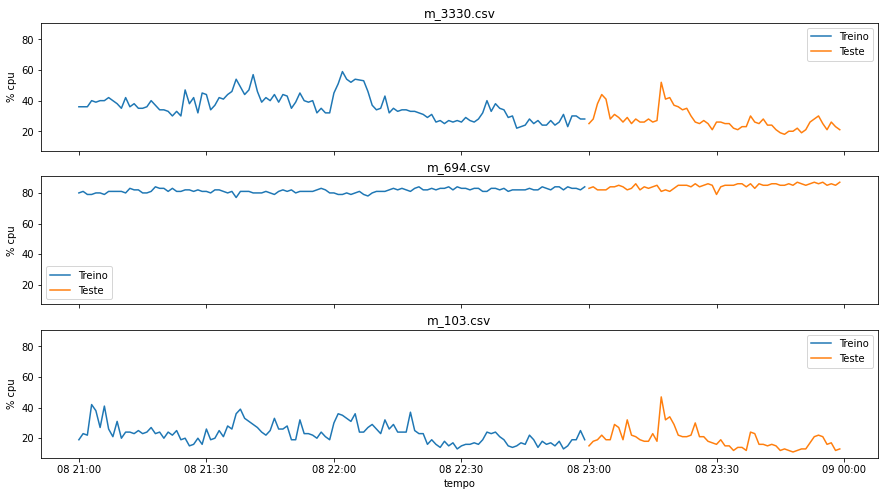

In [65]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15,8))
workload = workload3330
axs[0].set_title('m_3330.csv')
axs[0].plot(train3330.cpu[-120:], label="Treino")
axs[0].plot(test3330.cpu, label="Teste")
axs[0].set(ylabel="% cpu")
axs[0].legend()
axs[1].set_title('m_694.csv')
axs[1].plot(train694.cpu[-120:], label="Treino")
axs[1].plot(test694.cpu, label="Teste")
axs[1].set(ylabel="% cpu")
axs[1].legend()
axs[2].set_title('m_103.csv')
axs[2].plot(train103.cpu[-120:], label="Treino")
axs[2].plot(test103.cpu, label="Teste")
axs[2].set(ylabel="% cpu")
axs[2].legend()
plt.xlabel('tempo')